In [2]:
import pandas as pd
import numpy as np 

In [3]:

#Alojamientos turísticos

#pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una celda de jupyter notebook-->NO recomendable 
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en una celda de jupyter notebook
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

alojamientos=pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\alojamientos-turisticos-sample(ene2017)\alojamientos-turisticos-sample.csv",sep=",")
aloha=alojamientos.copy()

aloha.city=aloha['city'].apply(lambda x: str(x).lower())

aloha.iloc[0:3,:]




,apartment_id,url,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,26316169,https://www.airbnb.com/rooms/26316169,Olivia's Place,Olivia`s place es Piso reformado a nuevo pensa...,123008256,"Barrio tranquilo, hay un chino al lado que ven...",Este,NaN,36.72462,-4.35947,Entire home/apt,5,1.0,3.0,4.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,B...",80.0,2,30,True,0,0,0,167,11,2018-07-06,2019-08-25,96.0,10.0,10.0,10.0,10.0,8.0,9.0,Exempt,True,0.55,spain,malaga,2020-02-29
1,34672572,https://www.airbnb.com/rooms/34672572,1Bedroom apartment in Atocha - Wanda Metropoli...,Acogedor apartamento de 1 dormitorio y 1 baño ...,3256859,Este acogedor y amplio apartamento de dos dorm...,Cortes,Centro,40.41185,-3.69767,Entire home/apt,4,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",500.0,1,1125,True,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-10-16
2,32603220,https://www.airbnb.com/rooms/32603220,Modern apartment in a villa with pool,The fantastic outdoor area offering a view int...,107752533,La finca está ubicada entre Portocolom y Porto...,Felanitx,NaN,39.44821,3.24418,Entire home/apt,2,1.0,1.0,2.0,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",60.0,2,15,True,30,59,59,59,15,2019-04-07,2019-09-09,96.0,10.0,9.0,10.0,10.0,9.0,9.0,NaN,True,1.17,spain,mallorca,2020-04-23


In [80]:
#Ranking de ciudades por caracteristicas 

rk_ciu= pd.read_csv(r"C:\Users\reito\Documents\GitHub\77_Miss_Cosas\2.Analytics\EDA\remote_jobs_in Spain(2020)\nomad_cities.csv",sep="\t")
rk_ciu.place=rk_ciu['place'].apply(lambda x: str(x).lower()).copy() #Me aseguro de que todos los nombre de ciudades estan en minusculas en la columna 'place' 
rk_ciu.place=rk_ciu['place'].apply(lambda x : 'sevilla' if x=='seville' else x).copy() #En uno de los datasets aparece el nombre de sevilla en inglés , lo cambio 
rk_cminusc=rk_ciu.copy() #Hago una copia de rk_ciudad , y la emplearé para hace el merge con la otra tabla para así tener el ranking pero solo de ciudades de España 
rk_cminusc

#rk_cminusc#['place']
#rk_cminusc[rk_cminusc['place']=='madrid']

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,leisure,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,peace_score,place,places_to_work,press_freedom_index,racism,safety,weed
0,0,1.73,1.73,152.41,1273,1364,1.0,52.7,0.4,0.6,0.6,31,47.497912,0.80,0.27,0.86,19.040235,1.0,1.00,1.00,0.8,budapest,1.0,28.17,0.40,0.60,0
1,1,0.85,0.85,98.88,780,777,0.8,78.8,0.6,0.2,0.6,14,18.787747,0.62,0.60,0.75,98.993128,0.4,0.95,0.95,0.4,chiang mai,0.8,44.53,0.40,0.80,0
2,2,1.99,1.99,159.13,1653,1639,1.0,40.8,0.6,0.8,0.8,15,50.075538,1.00,0.60,0.83,14.437800,1.0,0.94,0.94,0.8,prague,1.0,16.66,0.42,0.80,1
3,3,1.88,1.88,47.01,1640,1545,1.0,DotMap(__next__=DotMap()),1.0,0.6,0.8,16,25.091075,1.00,0.80,0.93,121.559834,0.6,0.94,0.94,DotMap(__next__=DotMap()),taipei,1.0,24.37,0.00,1.00,0
4,4,5.00,5.00,200.00,3309,3028,0.8,34,0.6,0.6,0.8,118,30.267153,1.00,0.60,0.95,-97.743061,1.0,0.94,0.94,0.8,austin,1.0,22.49,0.80,0.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,776,4.00,4.00,28.58,332,2637,0.2,101.7,0.4,0.2,0.4,2,29.389036,0.20,0.20,0.11,71.635921,0.2,0.18,0.18,0.2,bahawalpur,0.4,48.52,0.20,0.20,0
777,777,2.00,2.00,183.00,1453,2980,0.2,104.7,0.4,0.2,0.4,3,33.325000,0.20,0.20,0.09,44.422000,0.2,0.17,0.17,0.2,baghdad,0.4,54.35,0.60,0.20,0
778,778,1.60,1.60,32.01,760,1099,0.4,80.2,0.6,0.2,1.0,4,3.420556,0.60,0.40,0.36,-76.522222,1.0,0.16,0.16,0.4,cali,0.4,44.11,0.40,0.20,1
779,779,5.00,5.00,360.00,1441,5009,0.2,93.9,0.2,0.2,0.2,1,39.019400,0.20,0.20,0.14,125.738100,0.4,0.15,0.15,0.2,pyongyang,0.2,83.76,0.00,0.20,0


In [81]:
df_ley=pd.DataFrame({'items':rk_ciu.columns})
df_ley.head(3) #df con la leyenda del significado de los valores columna 


,items
0,Unnamed: 0
1,coffee_in_cafe
2,cost_beer


In [96]:
matrix=pd.merge(left=aloha,right=rk_cminusc,how='left',left_on='city',right_on='place') #Union de tablas

#matrix
pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una celda de jupyter notebook-->NO recomendable 
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en una celda de jupyter notebook
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

#Elimino los campos que menos no presentan informacion numérica para la generacion de la matriz de Pearson #Me quito tambien las columnas fecha pq despues para Pearson dan Problemas
comodin=matrix.drop(columns=['url','name','description','neighborhood_overview','neighbourhood_name','neighbourhood_district',
                        'room_type','amenities_list','has_availability','license', 'is_instant_bookable','reviews_per_month', 
                        'country','first_review_date' ,'last_review_date','insert_date','place'],inplace=False)
matrix_rev=comodin.copy()############-->Es aquí donde deberia cmabiar la escala de los valores  de la tablade rk calidad cuidades


#poblaciones.drop(columns=['Municipios'],inplace=False)
#matrix_rload=matrix_rev.dropna(inplace=False) #Con matrix_rload quito todos los valores NaN que hayan surgido de la union de tablas
                                              #Al hacer esto elimino todos los datos de Disponibilidad a 1dia/sem/mes y estos NO SE HAN REGISTRADO en SEVILLA
                                              #Por lo tanto corro el riesgo de perder mucha informacion.Estrategia -->NO echar abajo la informacion de Sevilla y seguir adelante 
                                              #porque la informacion contenida en esas columna no parece muy relevante
                                              #Esto me obliga a que la tabla de trabajo para obtener las tablas de correlacion sea la de matrix_rev y luego si lo considero 
                                              #ya desecharé esas columnas si veo que no me revelan nada en la matriz de correlaciom 
# SE SOLVENTA EL PROBLEMA CON LOS NaN PORQUE DESCUBRO QUE SE DEBE A UNA MALA CONCATENACION DE TABLAS SEVILLE/SEVILLA 

#Se hace un flitro de las cinco ciudades mas destacadas y se deja todo preparado para una matriz de correlacion 
#Al final sacaríamos 5 matrices de correlacion ('madrid','barcelona','valencia','sevilla','girona','malaga','menorca','mallorca') 
#que nos darían una imagen de como son las ciudades preferidas de españa 
#Luego tendríamos que preguntarnos si es más adecuado tener una campervan ...o si nos sale más a cuenta en determinados momentos del año

ciudades=['madrid','barcelona','valencia','sevilla','girona','malaga','menorca','mallorca']
ciu_esp=matrix_rev[matrix_rev['city'].apply(lambda x: x in ciudades)] #dataset con las ciudades más atractivas para vivir a nivel turístico

#TOP 5 CIUDADES 
#VALENCIA
#print(matrix_rev['weed'])--> Este valor esta en la tabla de calidad de las ciudades para nomadas digitales
ciu_esp_val=matrix_rev[matrix_rev['city']=='valencia'].copy()

ciu_esp_val.drop(columns=['city'],inplace=True)
ciu_esp_val=ciu_esp_val.astype(float).copy()
ciu_esp_val=ciu_esp_val.dropna().copy()


# Verificar valores faltantes en cada columna
#missing_values = ciu_esp_val.isna().sum()

# Mostrar la cantidad de valores faltantes por columna
#print(missing_values)

#BARCELONA
ciu_esp_bar=matrix_rev[matrix_rev['city']=='barcelona'].copy()
ciu_esp_bar.drop(columns=['city'],inplace=True)
ciu_esp_bar=ciu_esp_bar.astype(float).copy()
ciu_esp_bar=ciu_esp_bar.dropna().copy()


#MADRID
ciu_esp_mad=matrix_rev[matrix_rev['city']=='madrid'].copy()
ciu_esp_mad.drop(columns=['city'],inplace=True)
ciu_esp_mad=ciu_esp_mad.astype(float).copy()
ciu_esp_mad=ciu_esp_mad.dropna().copy()


#MALAGA
ciu_esp_mlg=matrix_rev[matrix_rev['city']=='malaga'].copy()
ciu_esp_mlg.drop(columns=['city'],inplace=True)
ciu_esp_mlg=ciu_esp_mlg.astype(float).copy()
ciu_esp_mlg=ciu_esp_mlg.dropna().copy()


#SEVILLA
ciu_esp_sev=matrix_rev[matrix_rev['city']=='sevilla'].copy()
ciu_esp_sev.drop(columns=['city'],inplace=True)
ciu_esp_sev=ciu_esp_sev.astype(float).copy()
ciu_esp_sev=ciu_esp_sev.dropna().copy()



In [84]:
# Importamos todos los paquetes que vayamos a necesitar
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
#pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

#import warnings
#warnings.filterwarnings("ignore")
#import sklearn
#sklearn.__version__

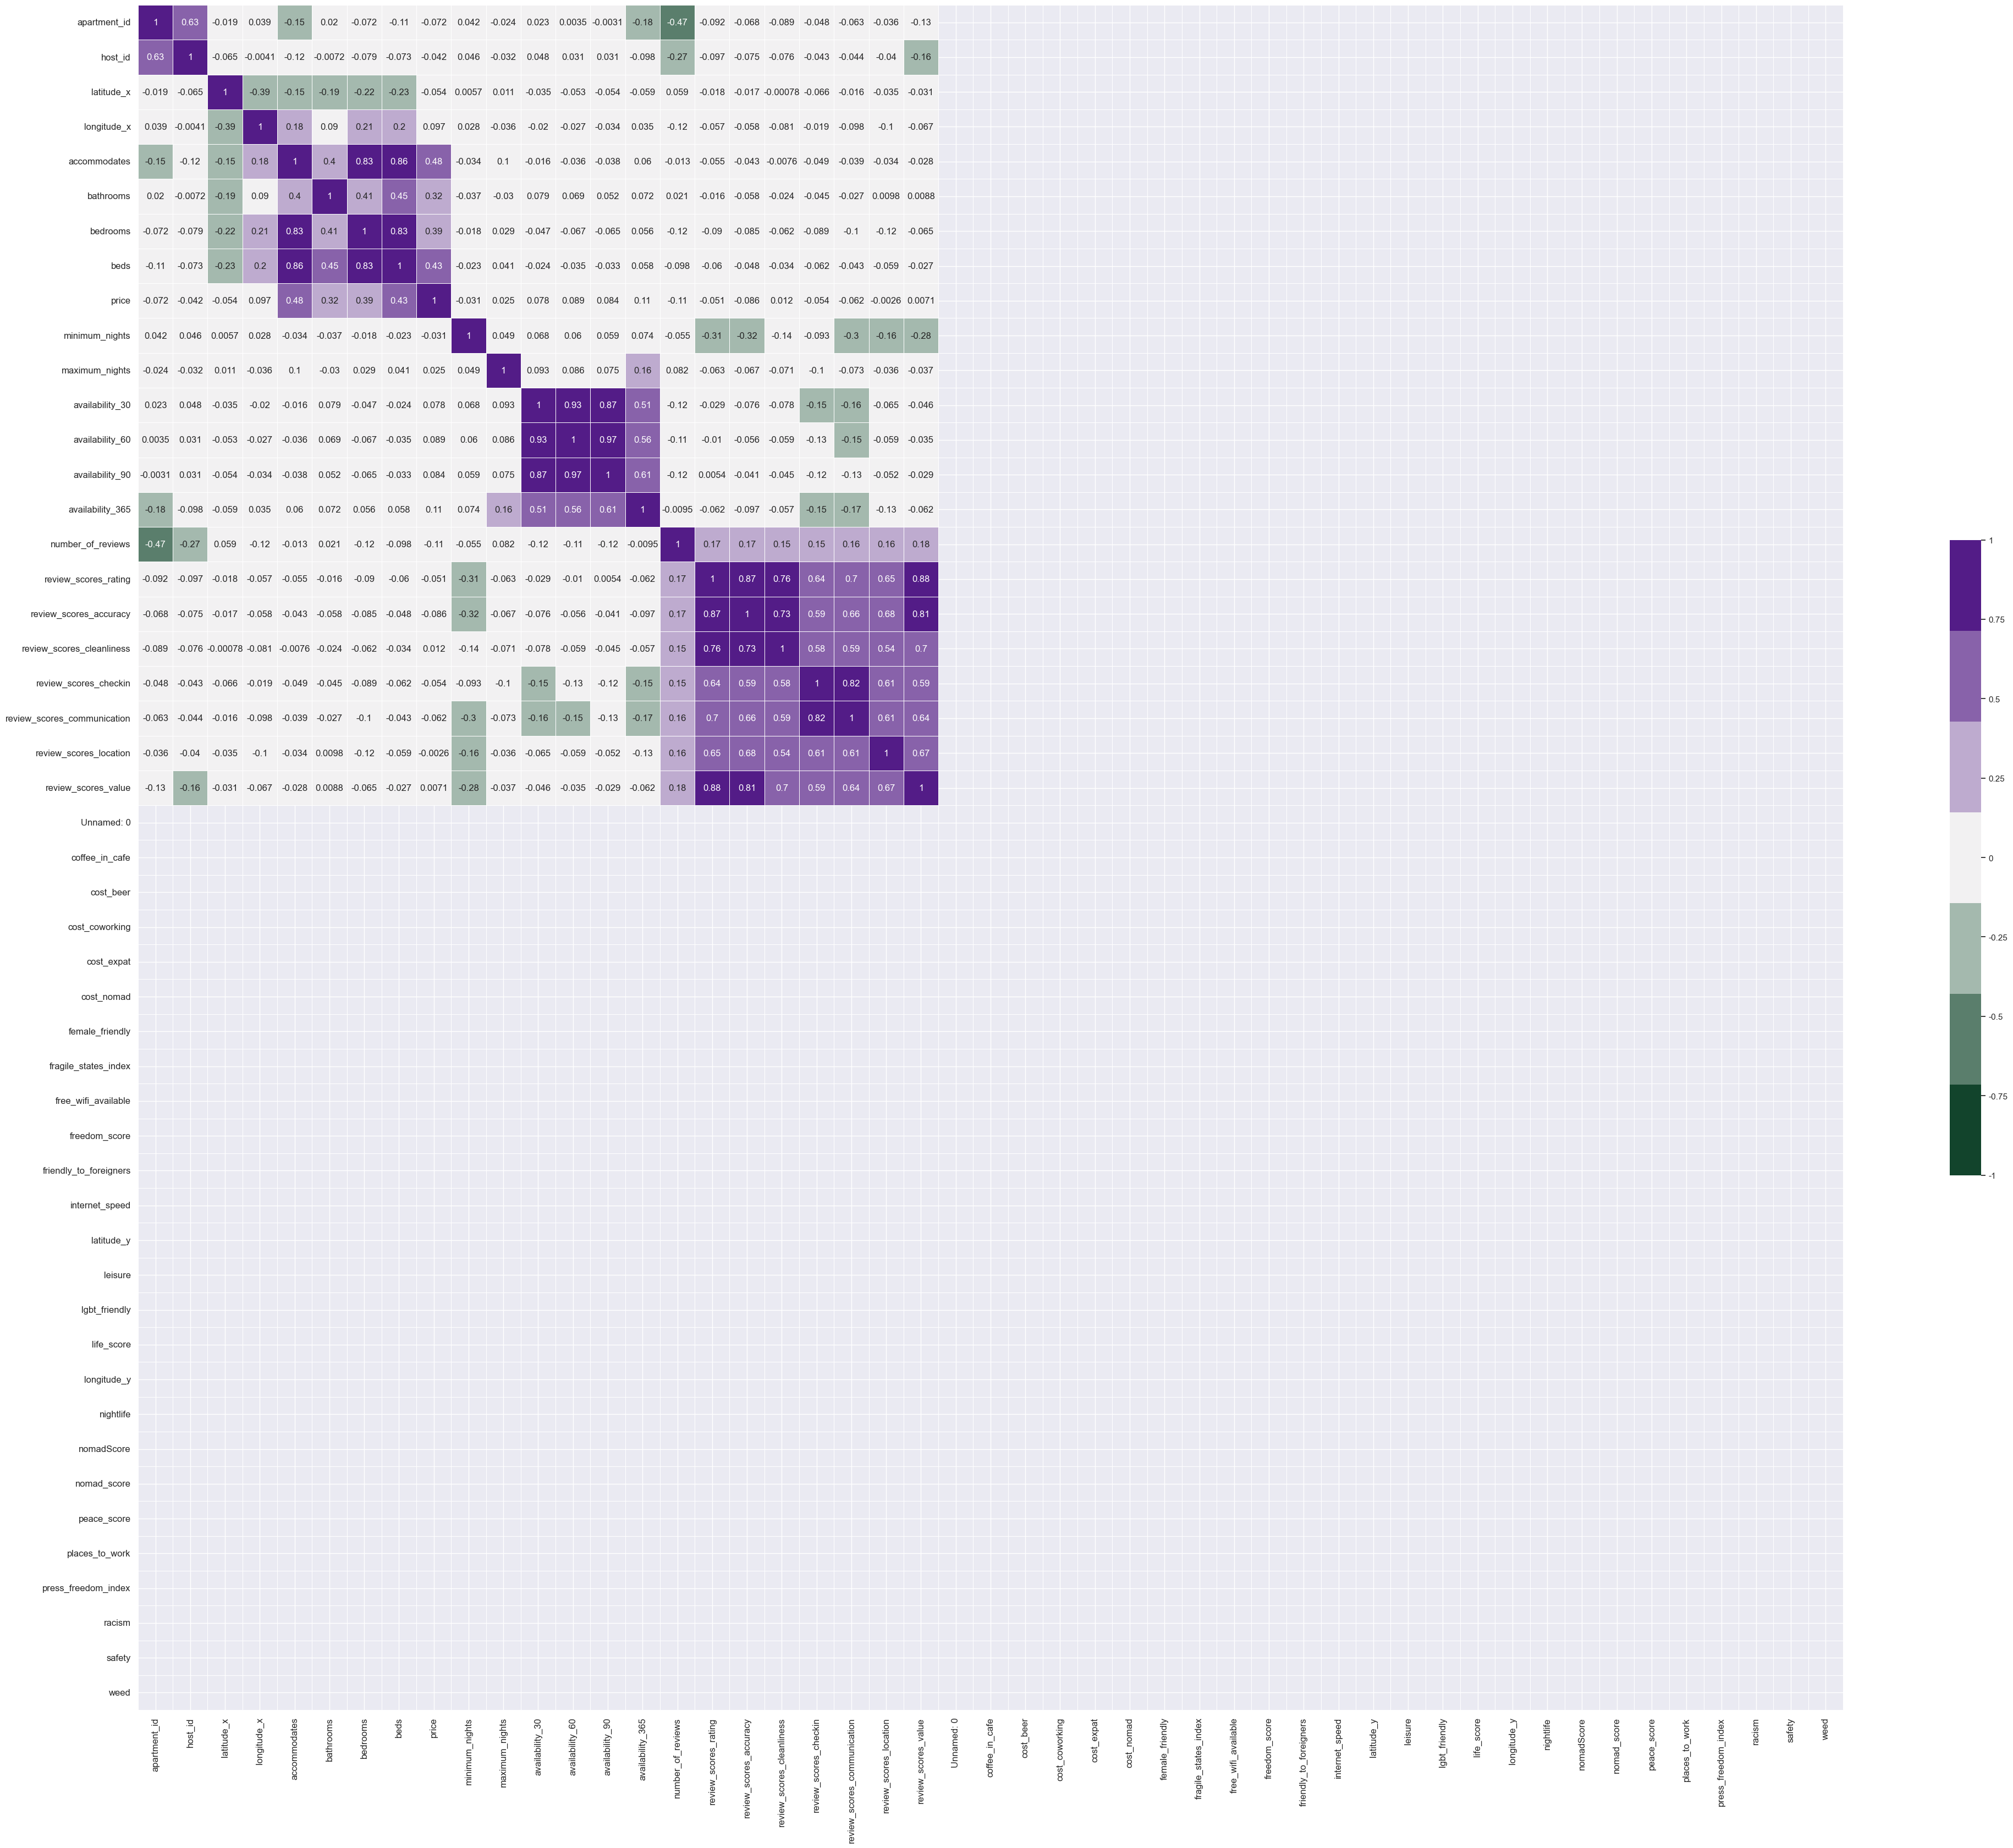

In [85]:
#TABLA COEFICIENTE CORRELACION VALENCIA 

plt.figure(figsize=(50,50))

heatmap=sns.heatmap(ciu_esp_val.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()

#Para generar la matriz de correlacion, no se reconocen los valores fecha que hay en los campos
#['first_review_date' ,'last_review_date','insert_date'] 
# Convertir la columna 'fecha_registro' a tipo de dato datetime -->No contiene informacion relevante se elimina de la tabla 


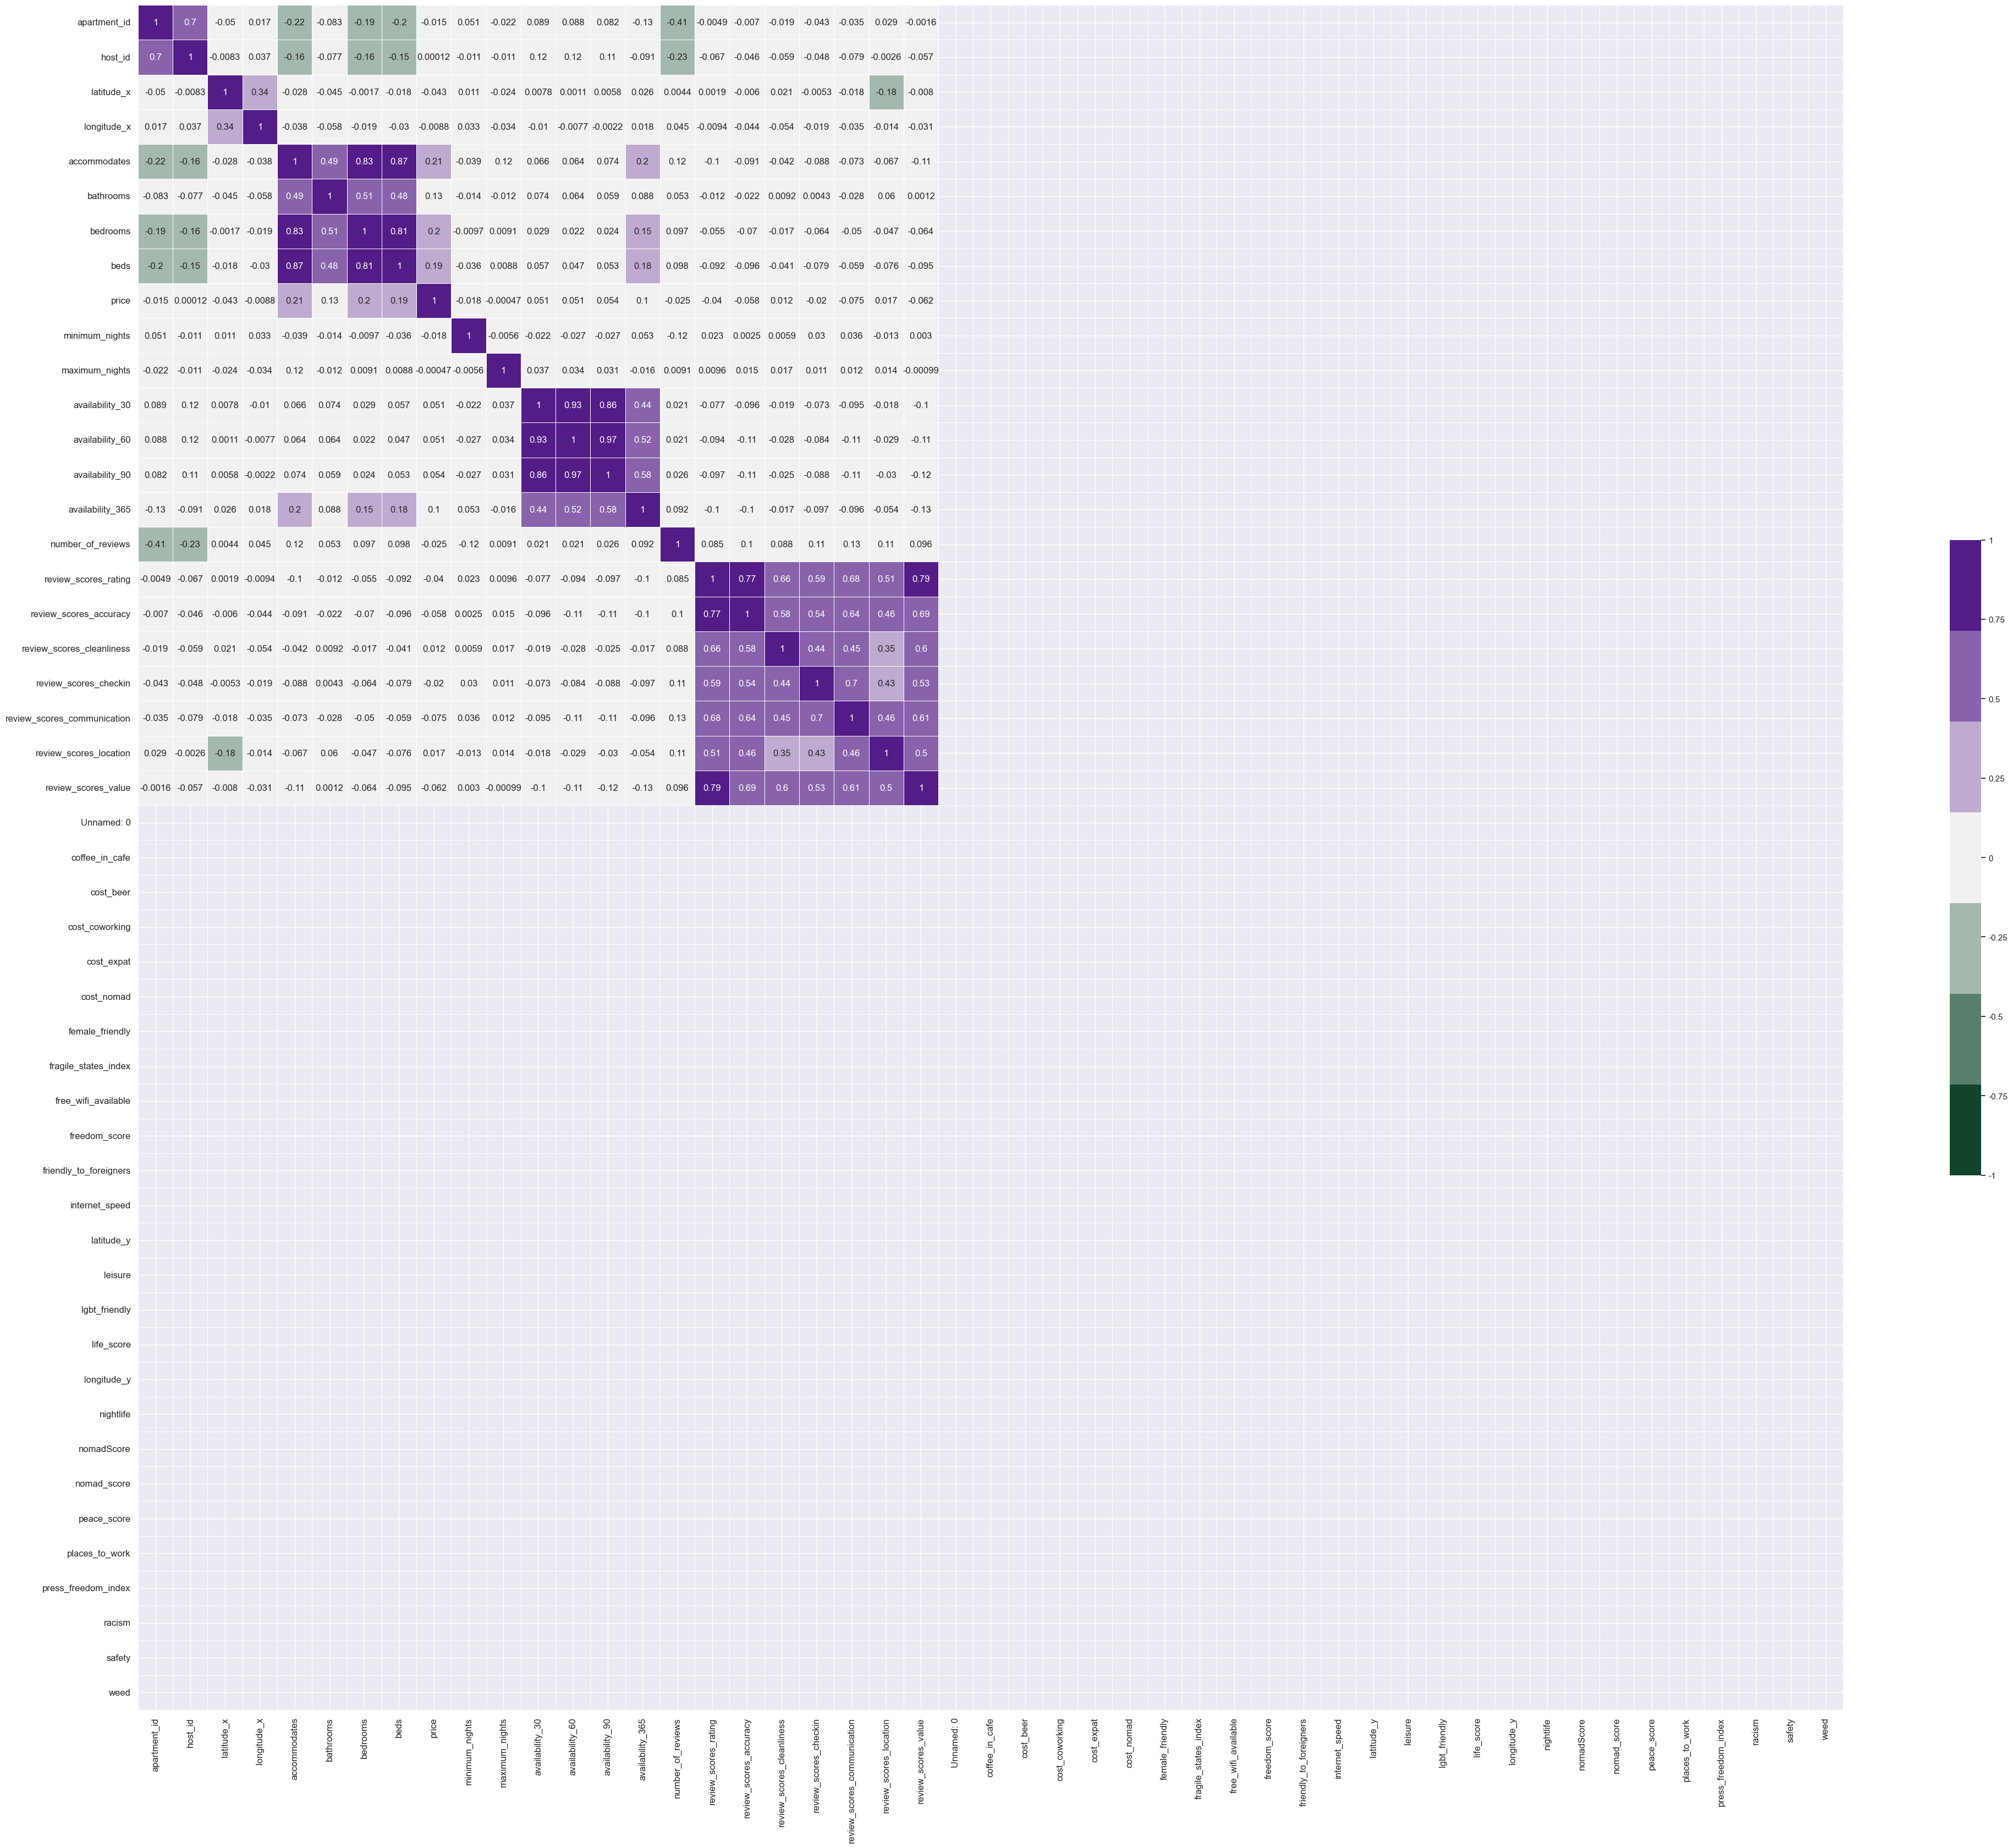

In [76]:
#TABLA COEFICIENTE CORRELACION BARCELONA 

plt.figure(figsize=(50,50))

heatmap=sns.heatmap(ciu_esp_bar.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()

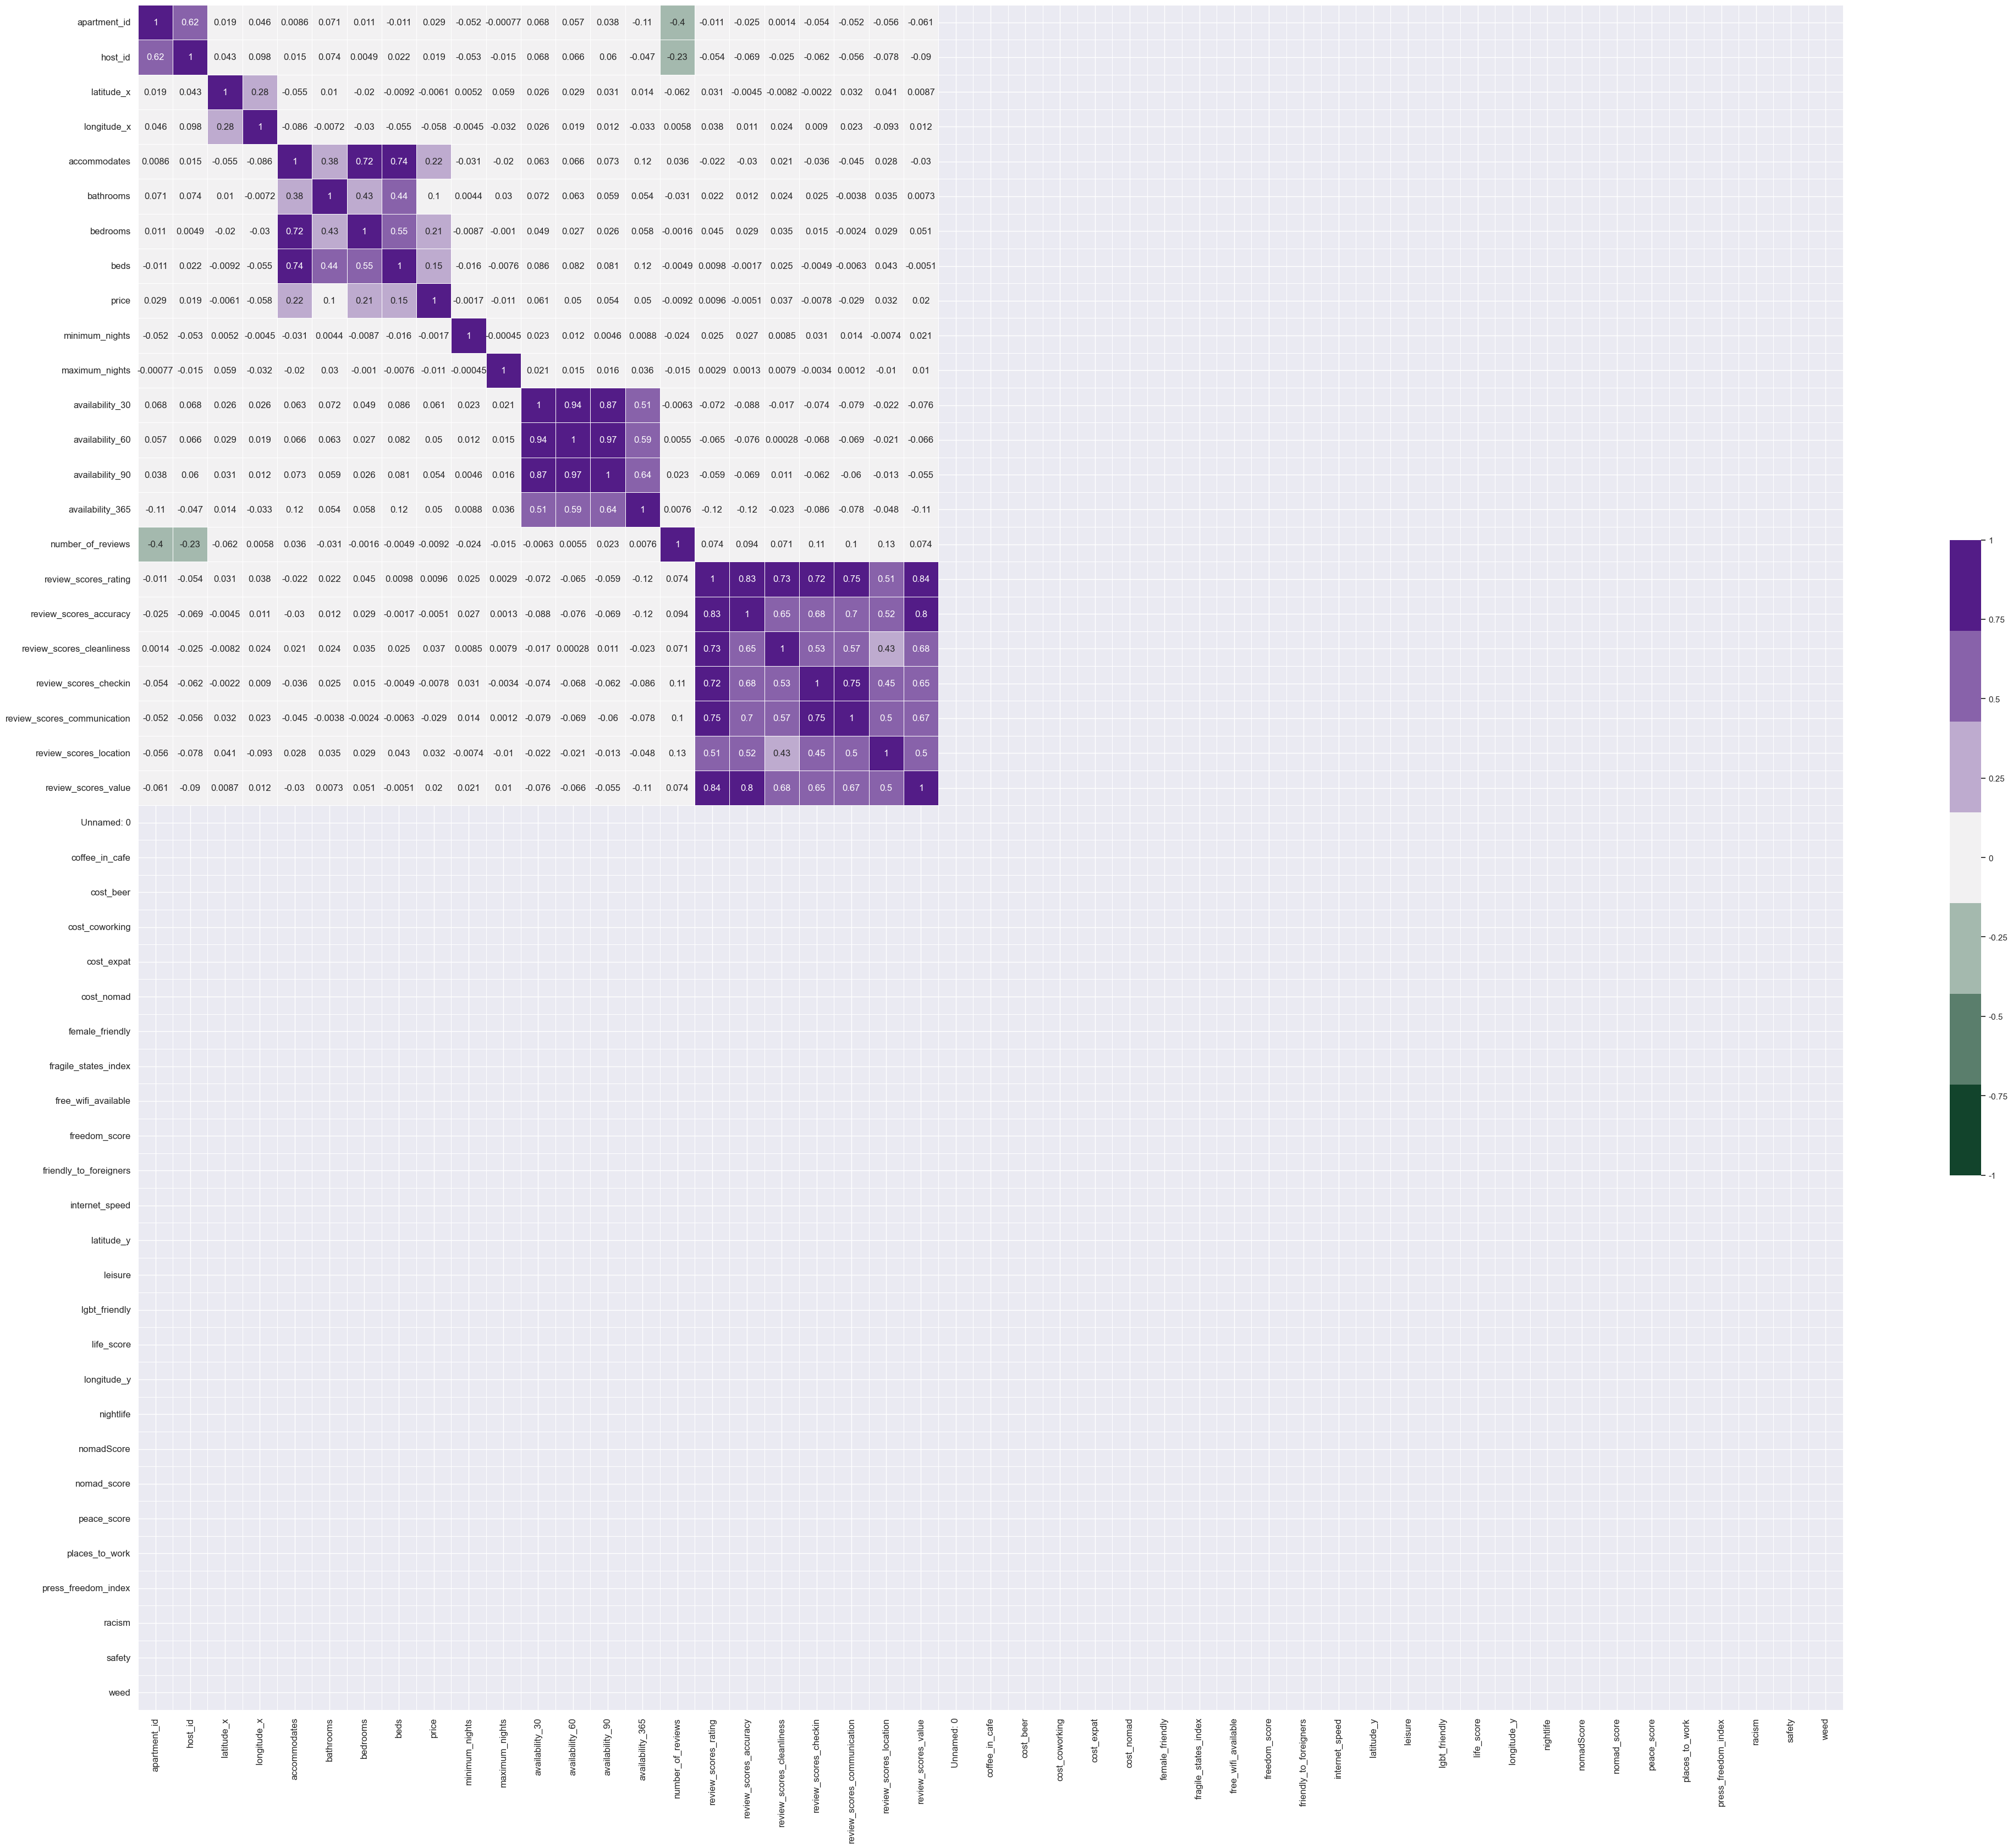

In [77]:
#TABLA COEFICIENTE CORRELACION MADRID 

plt.figure(figsize=(50,50))

heatmap=sns.heatmap(ciu_esp_mad.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()

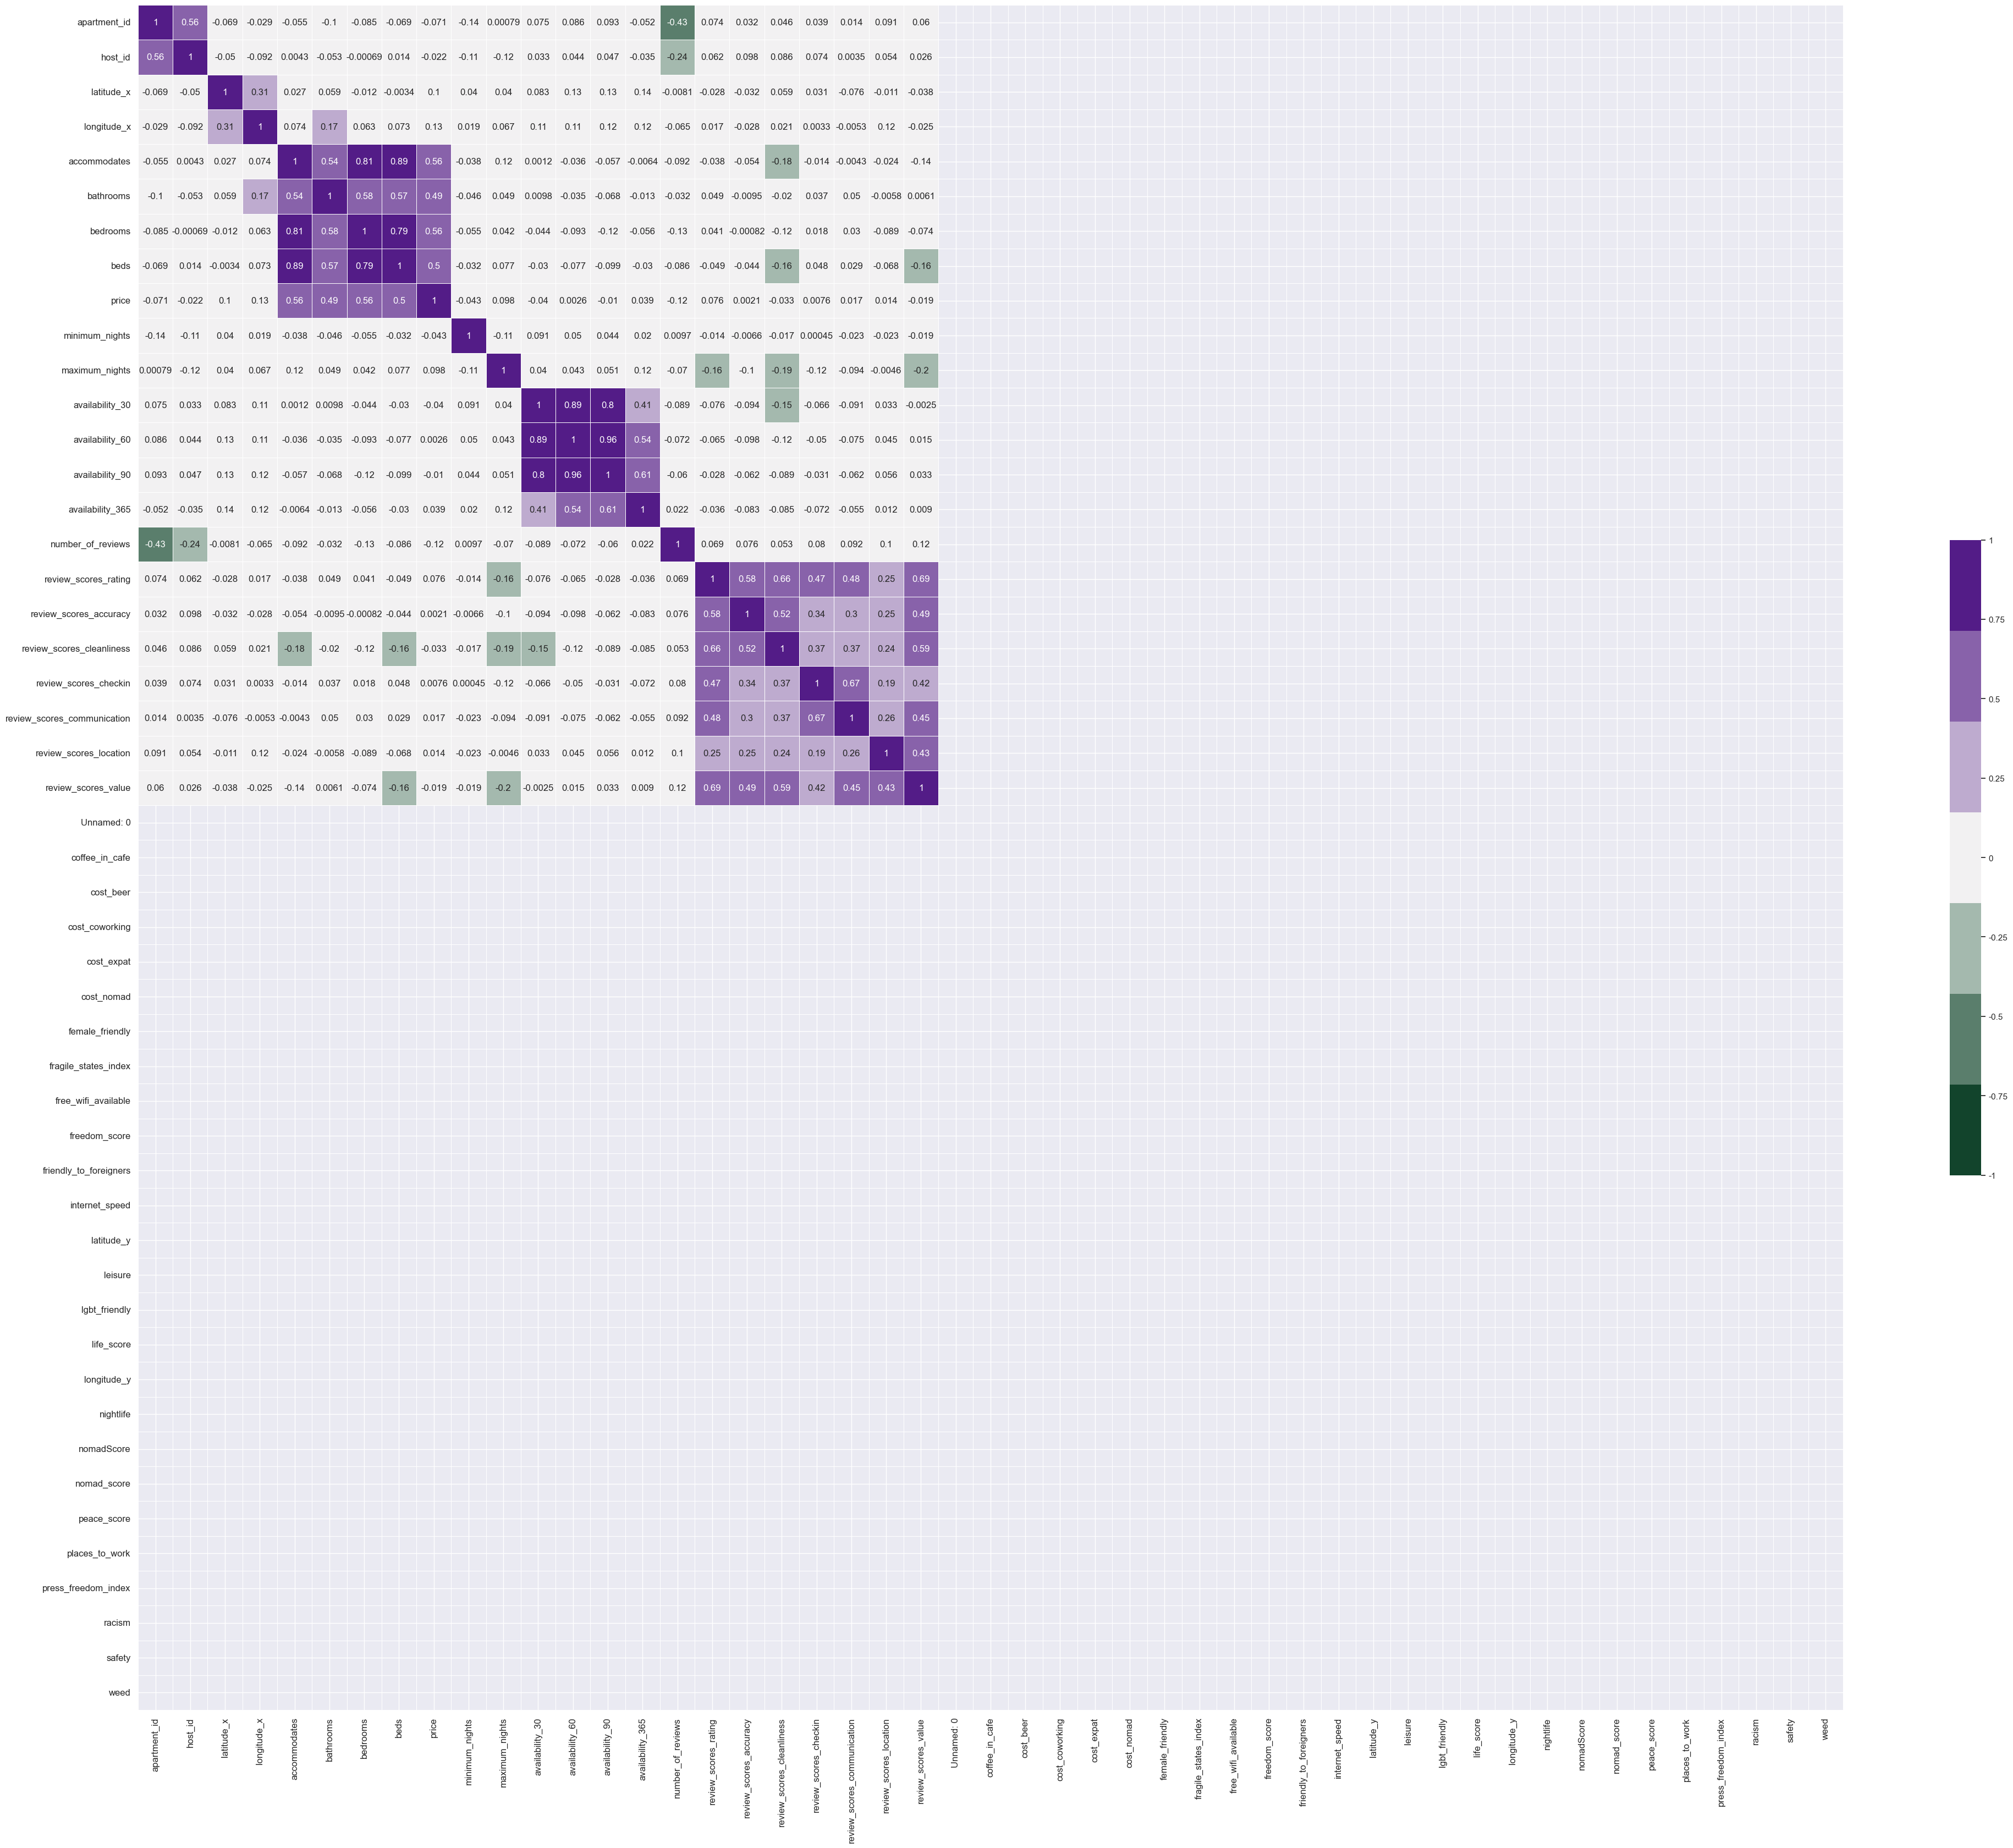

In [78]:
#TABLA COEFICIENTE CORRELACION MALAGA 

plt.figure(figsize=(50,50))

heatmap=sns.heatmap(ciu_esp_mlg.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()

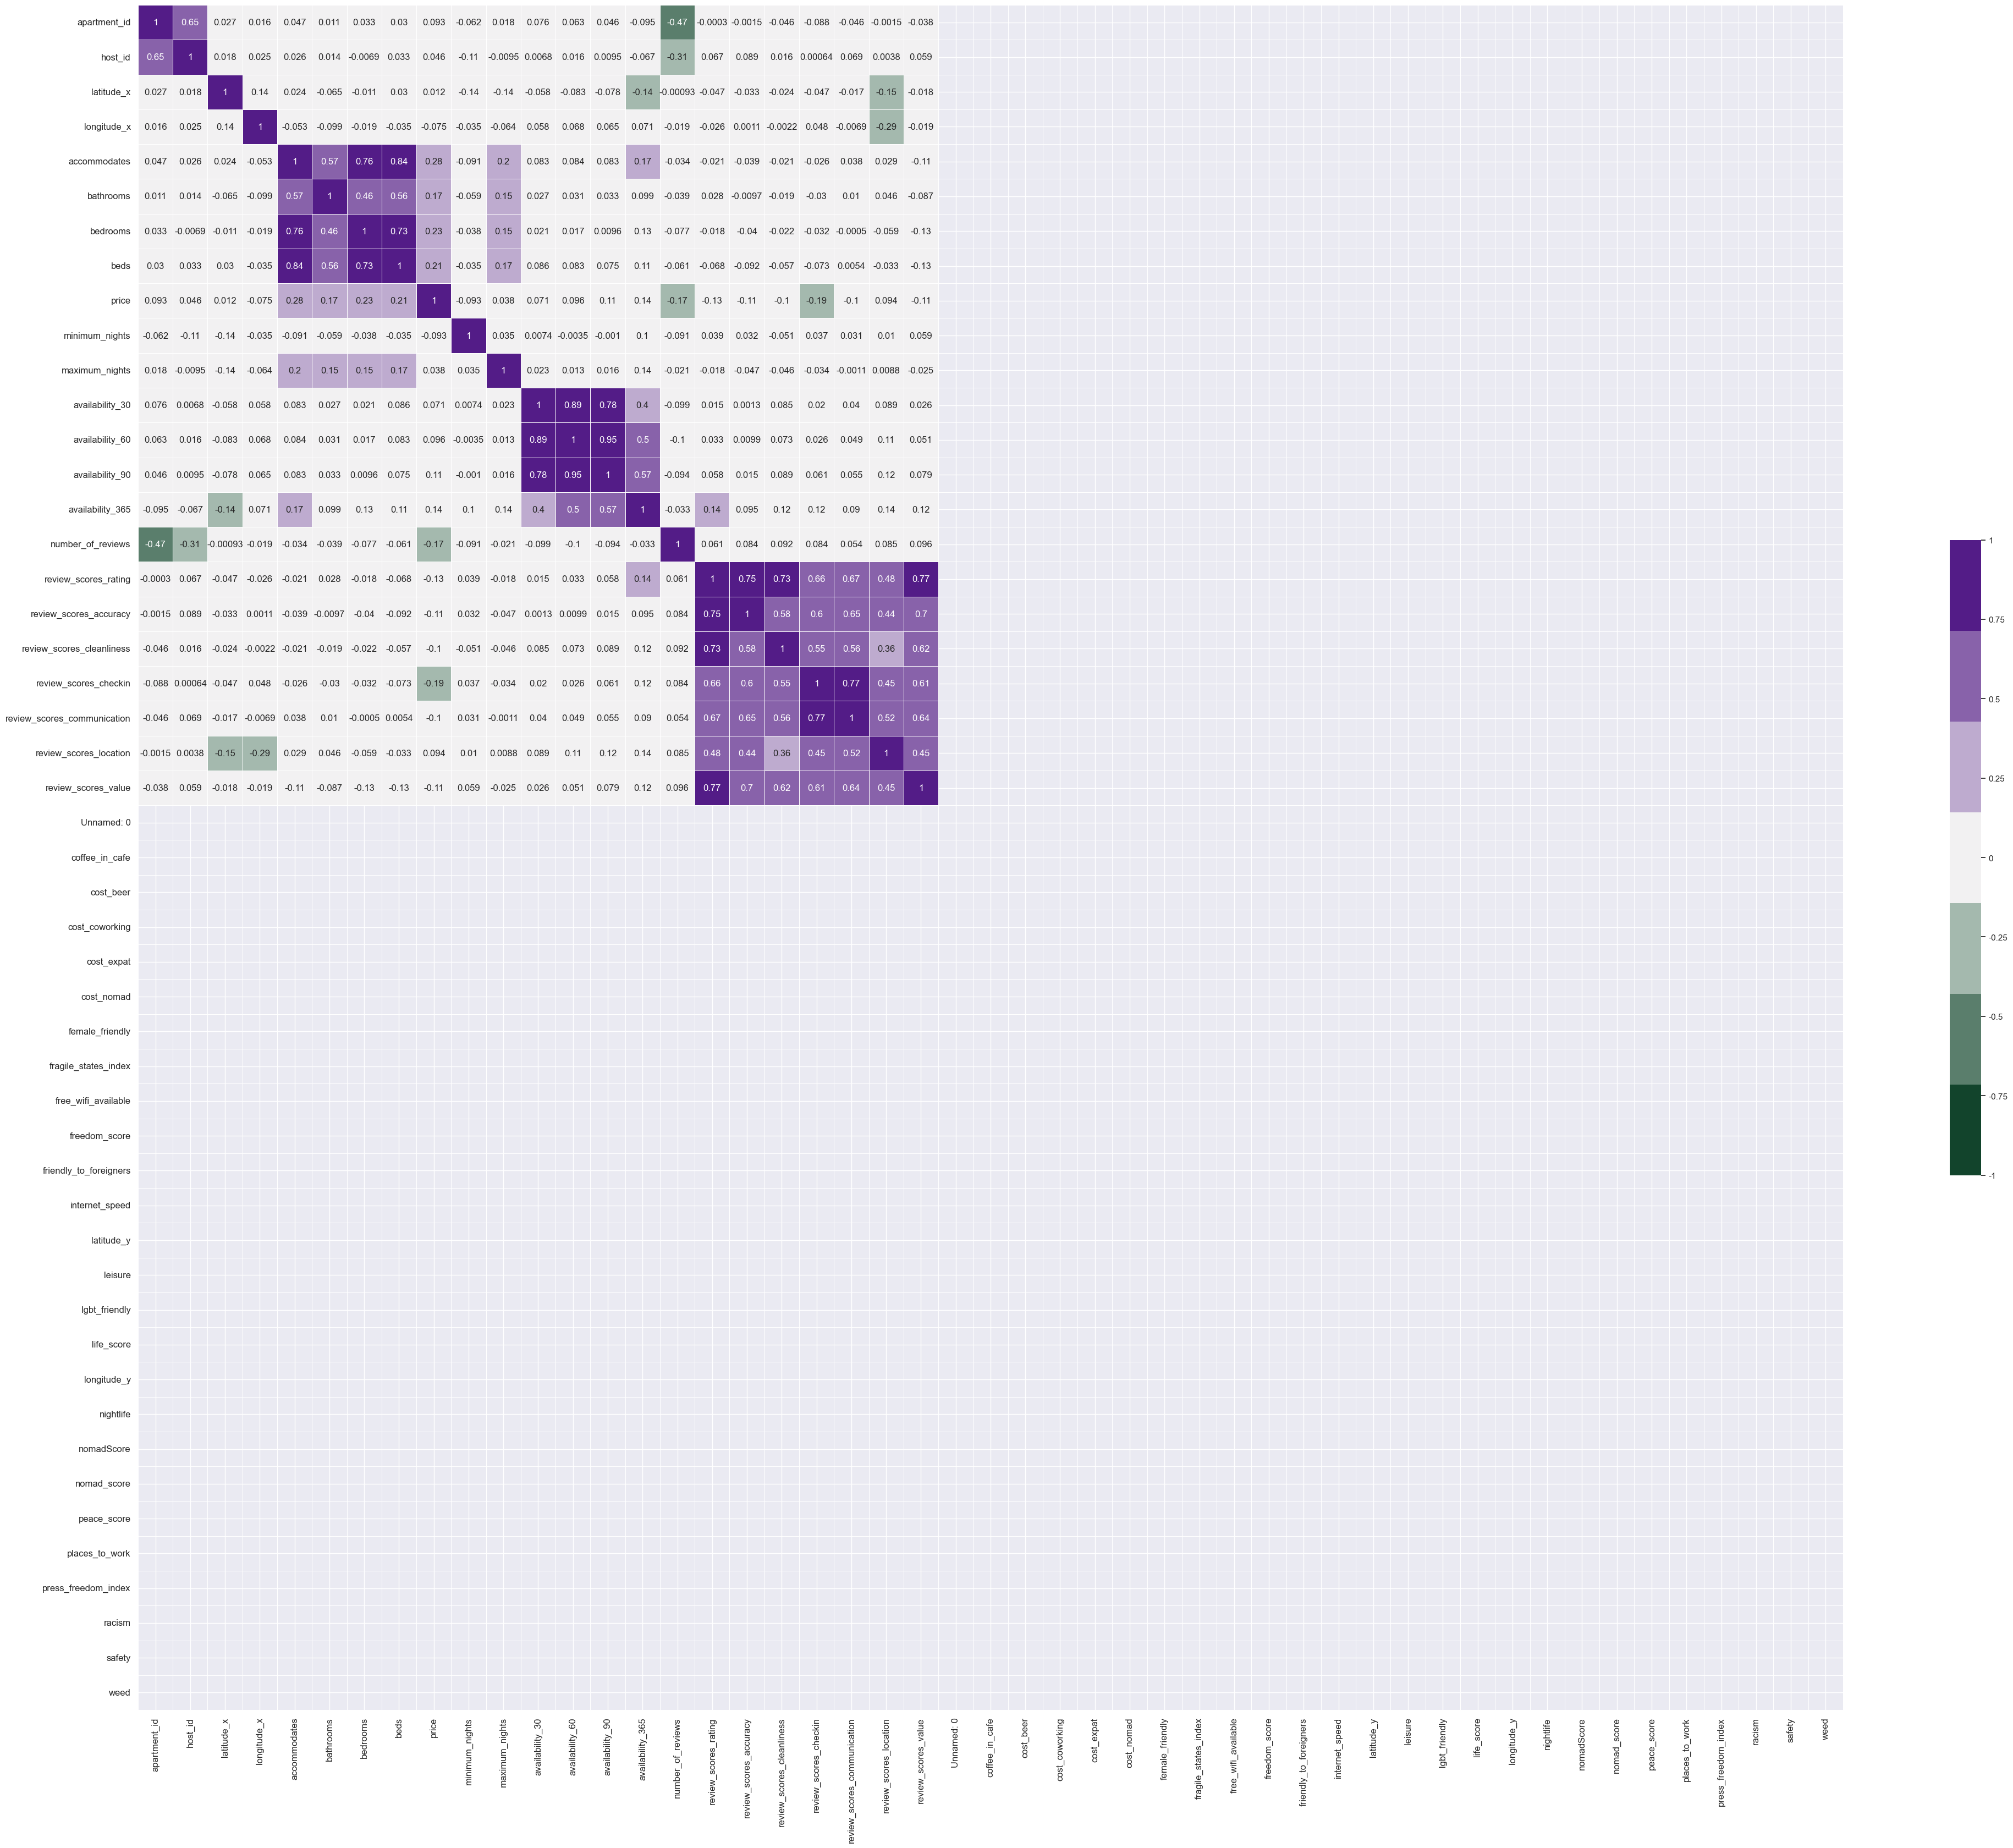

In [79]:
#TABLA COEFICIENTE CORRELACION SEVILLA 

plt.figure(figsize=(50,50))

heatmap=sns.heatmap(ciu_esp_sev.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),  
annot = True,  
square = True,
linewidth = .5,
annot_kws={"size": 12},  # Ajustar el tamaño de fuente de los números
cbar_kws={"shrink": 0.3}  # Ajustar el tamaño de la barra de color (escala)
);

plt.xticks(rotation=90, fontsize=32)  # Rotar y aumentar el tamaño de fuente en el eje x
plt.yticks(rotation=0, fontsize=32)   # Aumentar el tamaño de fuente en el eje y

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Define los valores deseados
cbar.set_ticklabels([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])  # Asigna etiquetas correspondientes

plt.show()